In [1]:
library(tidyverse)
library(ggplot2)

setwd("~/Repositories/AirQualityCOVID/")

── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
variable <- "no2"
method <- "lm"

In [3]:
load(paste("data/Analysis/predictions-",
                          method,"-", variable,".rda", sep=""))
results <- results %>% filter(pred.qq != 0)
results$diff <- 100*(results$obs - results$pred.qq) / results$pred.qq 

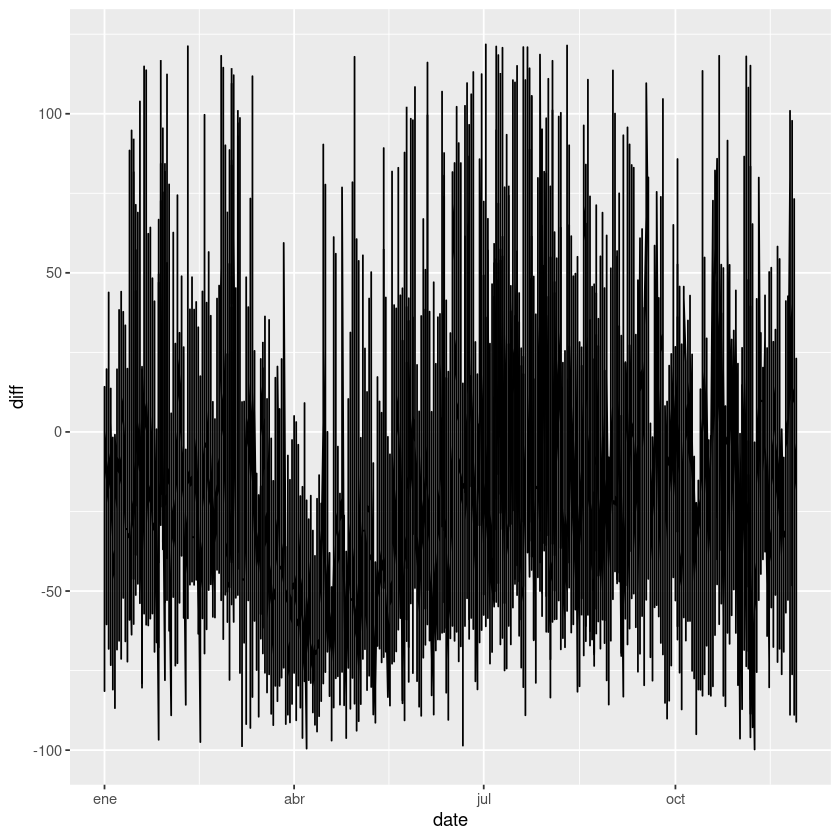

In [9]:
source("src/Cross-validation/preProcess.R")

results <- filter.IQR(results, columns = "diff", 3)

ggplot(results) +
    geom_line(aes(x=date, diff))

In [10]:
write.csv(results %>% 
            select (date, site, diff), "data/results.csv", row.names=F)